In [1]:
import qrcode
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image 

In [2]:
path_to_report = '/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/Shipping details 2.2.23.xlsx'
img_folder_path = '/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/output_qr_codes/'
pdf_path = "/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/ouput_pdf/qr_codes.pdf"

In [3]:
df = pd.read_excel(path_to_report, header = 1)
df.head()

,PO Number,Customer Name,Name on Frame,Frame Type,Size,Color,Type,Magnification,WD,Print Remarks
0,PO 1805,Jamil Alayan,BD16611,UK Rectangular,M,Graphite,Ergo,x6,560,NaN
1,PO 1805,Abdul Qadir Jailani Bin Dzulkurna,BD16610,UK Rectangular,M,Royal Navy,Ergo,x6,520,NaN
2,PO 1805,Tim Clair,BD16626,UK Rectangular,M,Royal Navy,Ergo,x6,570,NaN
3,PO 1805,Ahmed Al-Rubie,BD16631,UK Rectangular,M,Royal Navy,Ergo,x6,530,NaN
4,PO 1805,Kirstie Malley,BD16662,UK Round,S,Graphite,Ergo,x6,490,NaN


BD16611 - Jamil Alayan


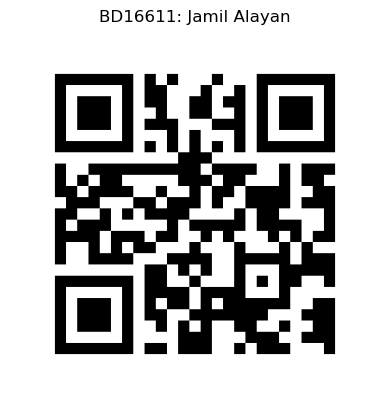

BD16610 - Abdul Qadir Jailani Bin Dzulkurna


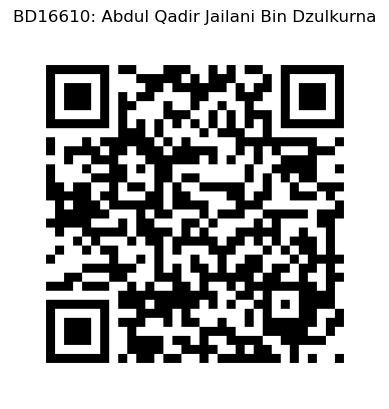

BD16626 - Tim Clair


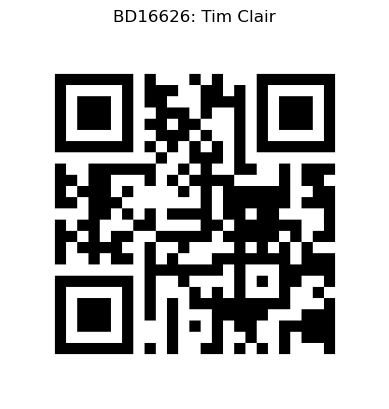

BD16631 - Ahmed Al-Rubie


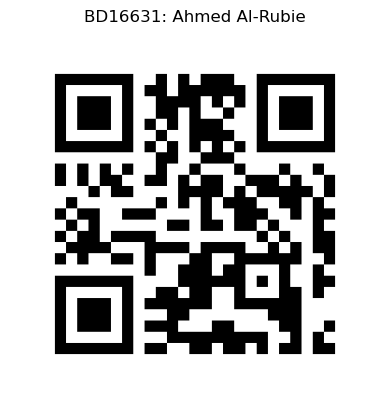

BD16662 - Kirstie Malley


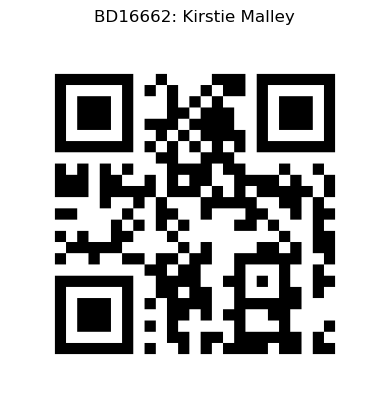

BD16678 - Kim Nguyen


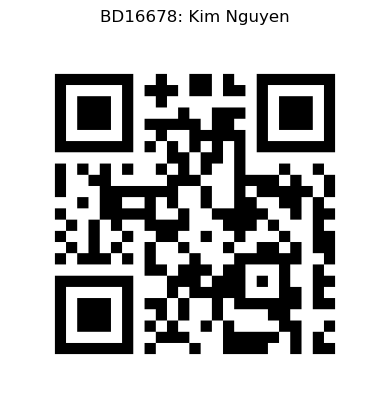

BD16511 - Usama Asif


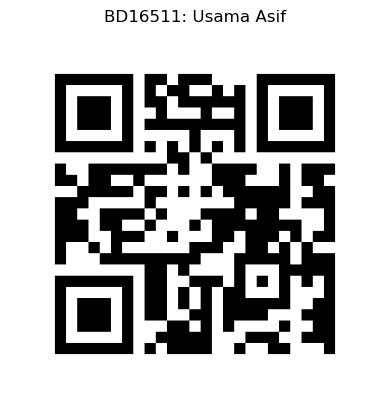

BD12971 - Annie Tran


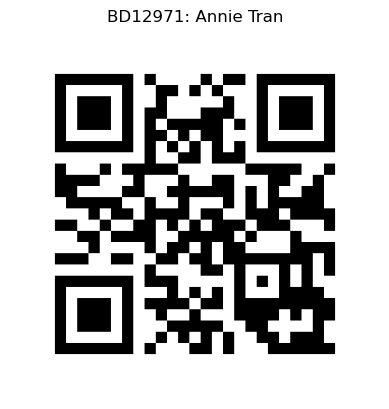

BD15464 - Karolina Jaloveckaite


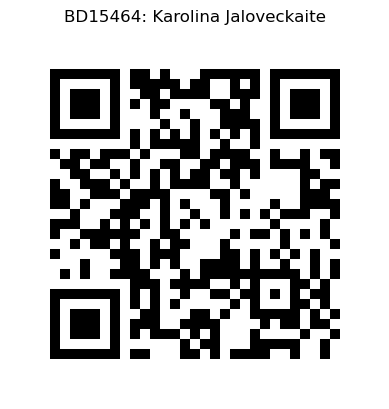

BD15466 - Agata Casey


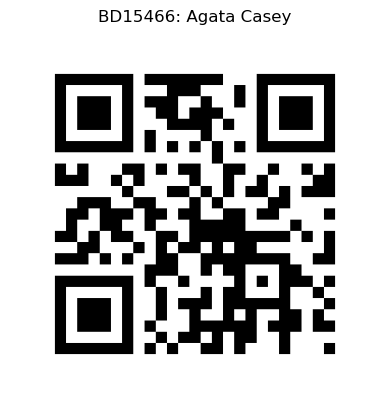

BD15590 - Kinda Award


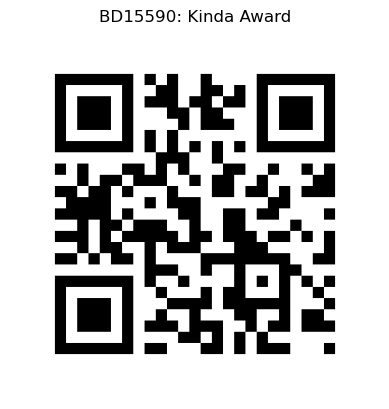

BD16354 - Sunkyo Kim


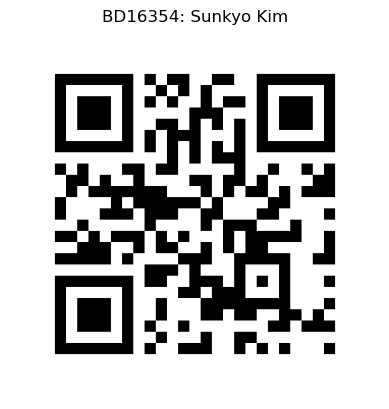

BD16386 - Dominic Bolderson


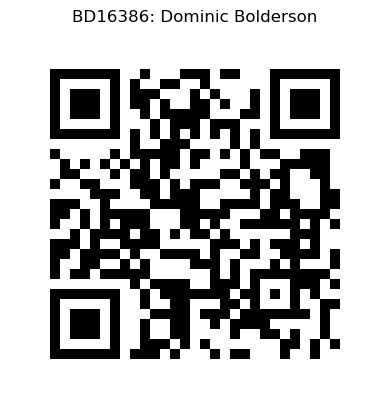

BD16453 - Cole Mcconnell


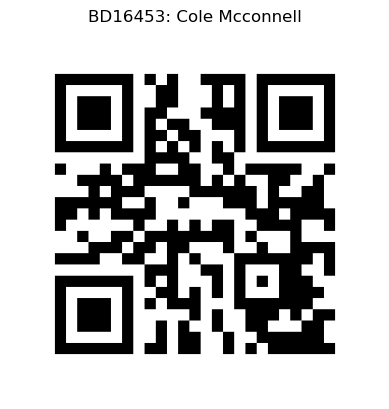

BD16508 - Jessica Oakhill


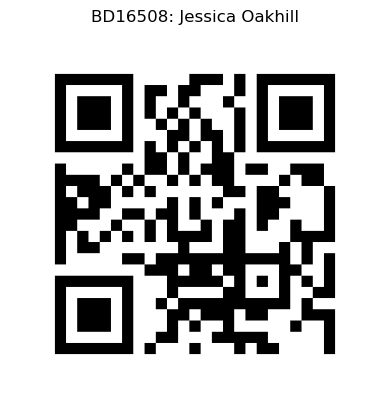

BD16538 - Inderdeep Gill


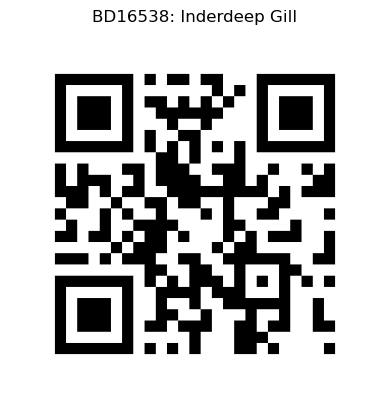

H10375 - Tiyam Shalali


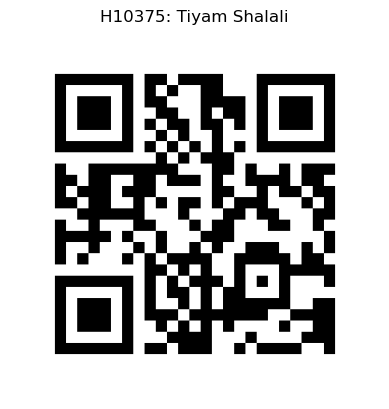

BD16658 - Caroline Lean


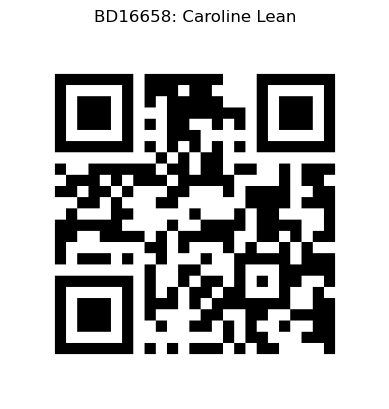

BD16660 - Ciara Ennis


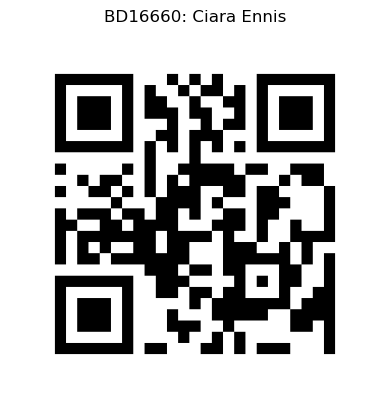

BD16697 - Petra Papp


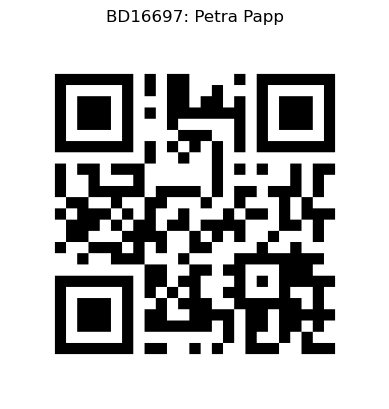

BD11609 - Lindsey Mathers


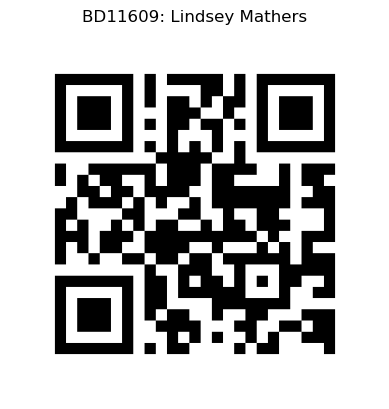

BD13573 - Tayba Akhter


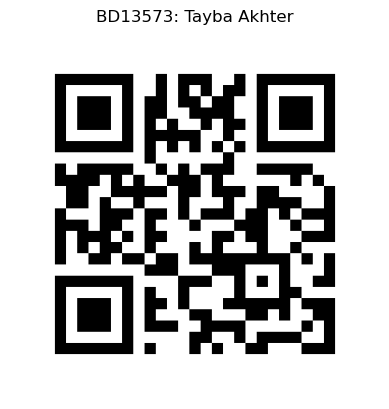

BD14255 - Clare Oâ€™Neill


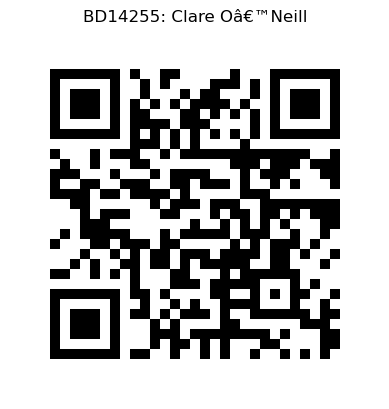

BD14409 - Ajay Verma


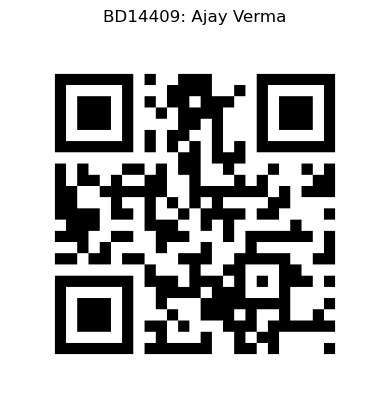

BD15104 - Serena Chandra


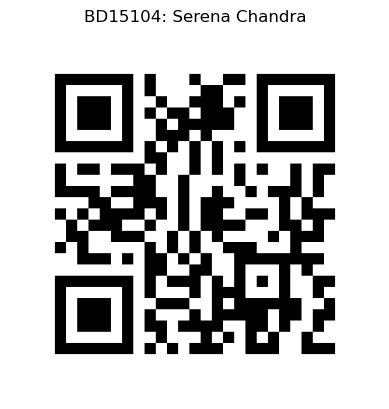

BD15751 - Mehroze Umar


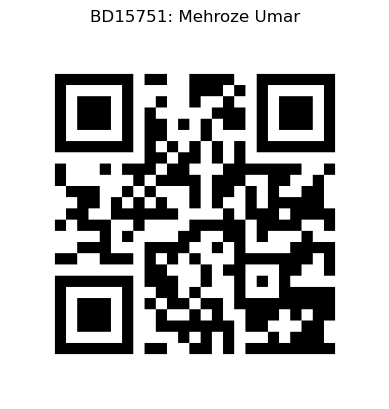

BD15796 - Knut Wernitz


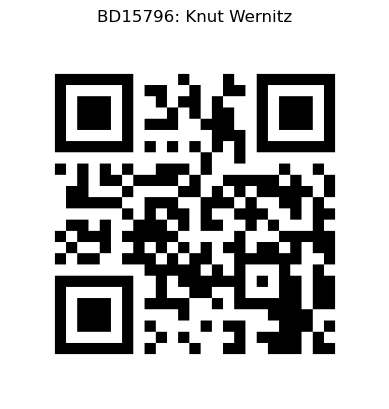

BD15877 - Sara Saidpour


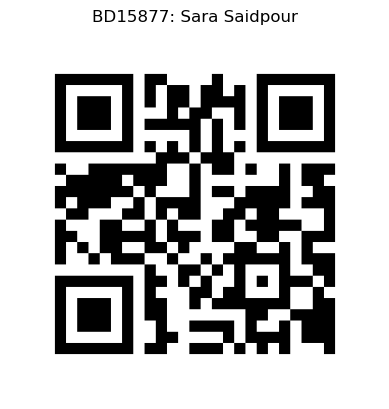

BD16057 - Shilan Rostamian


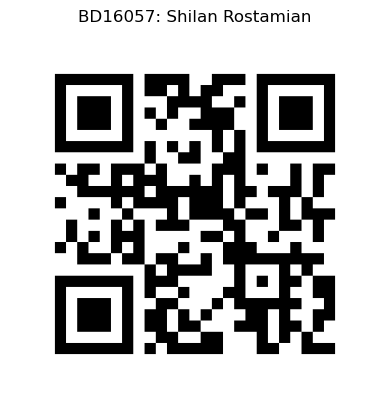

BD16110 - Preeti Purewal


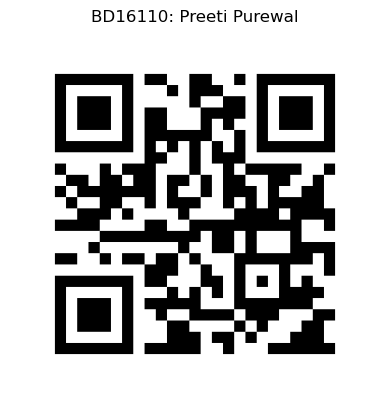

BD16202 - Guy Stephens


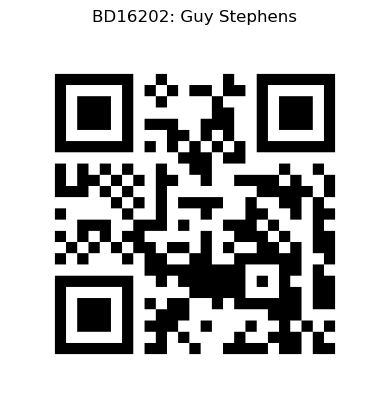

BD16229 - Shatha Alhomoud


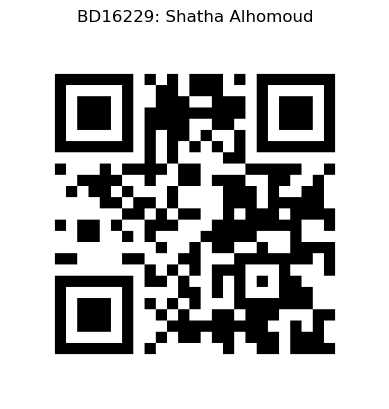

BD16295 - Arthi Chennakesavan


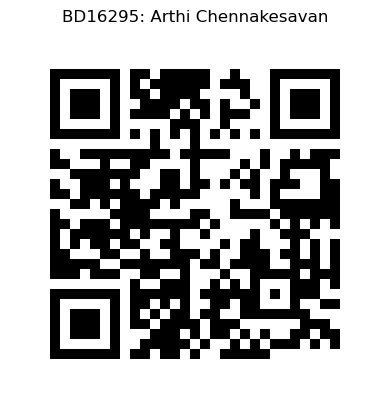

BD16358 - Katherine Zhao


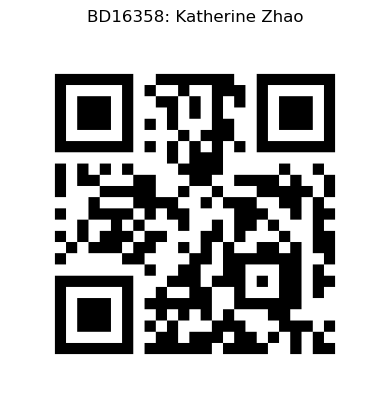

BD16431 - Chintan Patel


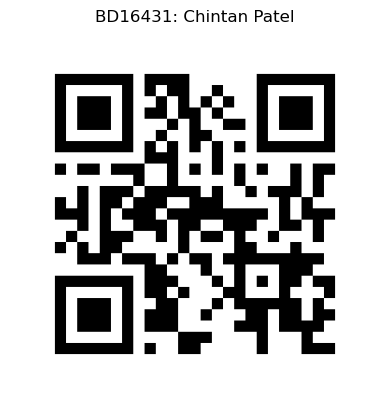

BD16444 - Kirsty Cowan


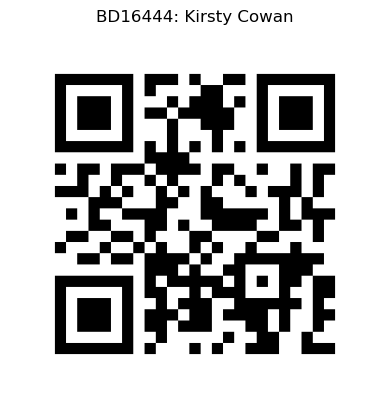

BD16461 - Shannon Polson


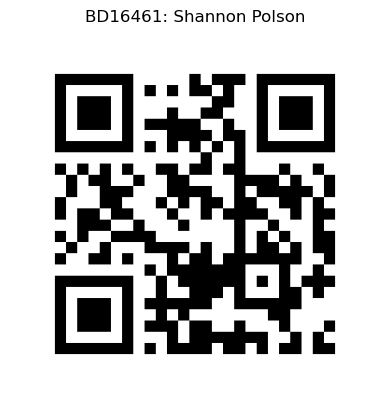

BD16560 - Florin Cret


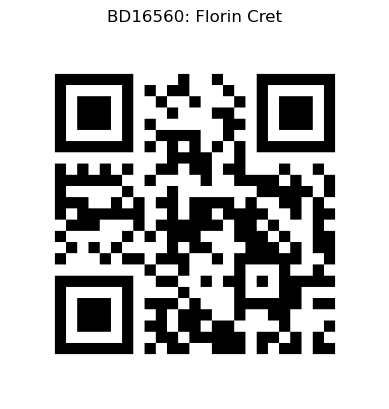

BD16590 - Raina Palit


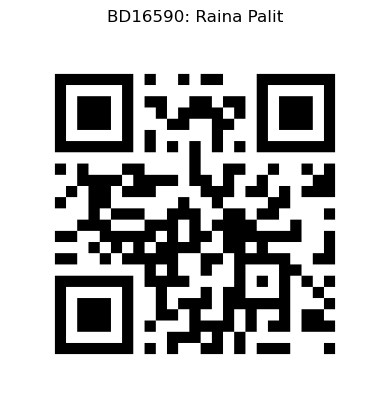

BD16622 - Nash Padayachee


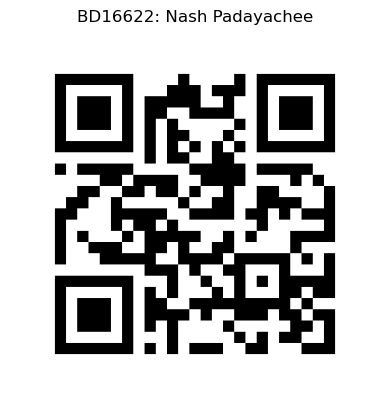

H10379 - Elaine Man


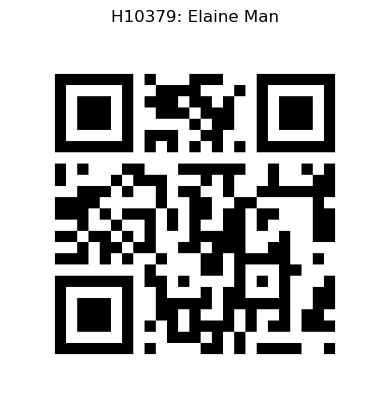

H10378 - Anita Lugiman


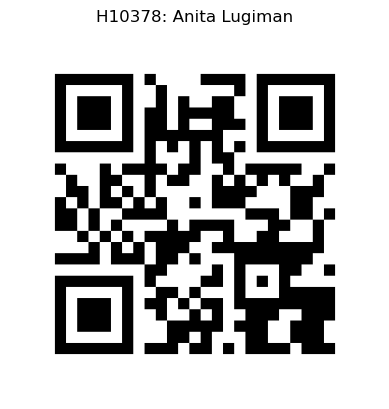

BD16637 - Amrit Marwaha


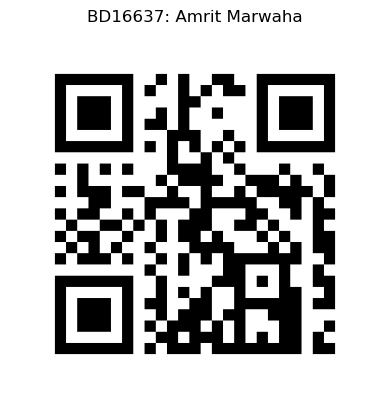

BD16650 - Hanifa Greenwood


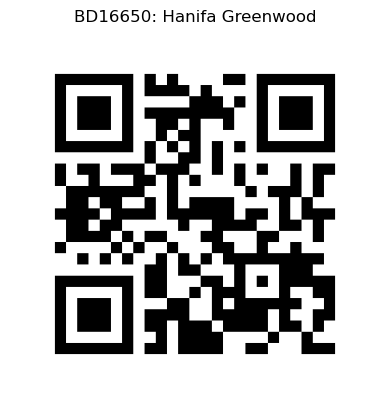

BD16643 - Arezoo Faroughi


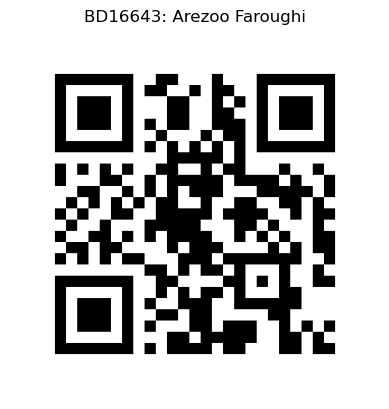

BD16655 - Lewis Ferrett


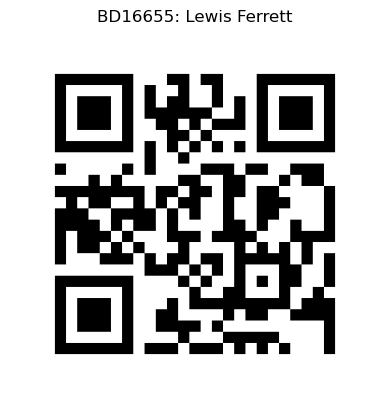

BD16672 - Darsh Thacker


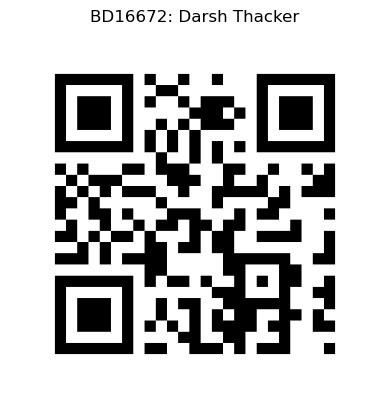

BD16681 - Aschani Thayaparan


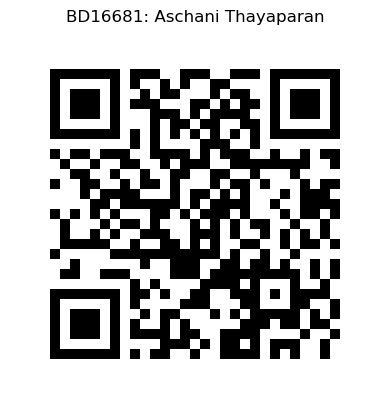

BD16692 - David Tan


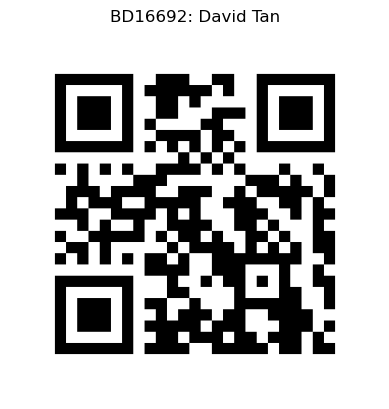

BD16691 - Jack Thomas


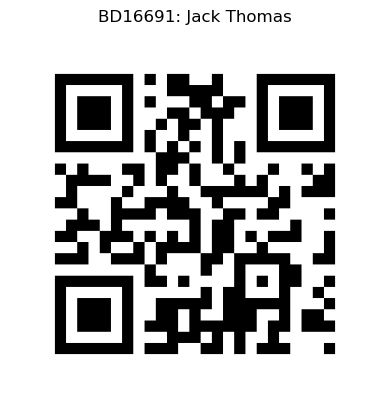

In [4]:
file_name_list = []
for i in range(len(df)):
    unique_id_temp = df['Name on Frame'].iloc[i]
    if len(unique_id_temp) > 2:
        qr_code_message = str(df['Name on Frame'].iloc[i] + ' - ' + df['Customer Name'].iloc[i])
        print(qr_code_message)
        img = qrcode.make(qr_code_message)
        im = img.convert('LA')
        im = plt.imshow(im, cmap='gray')
        im = plt.title(df['Name on Frame'].iloc[i] + ': ' + df['Customer Name'].iloc[i])
        im = plt.axis('off')
        name = df['Name on Frame'].iloc[i] + '_QR_code.jpg'
        file_name_list.append(name)
        plt.savefig(img_folder_path + name, transparent  = True, bbox_inches = 'tight', dpi = 1000)
        plt.show()

In [5]:
images = [Image.open(img_folder_path + f) for f in file_name_list]
images[0].save(pdf_path, "PDF" ,resolution=100.0, save_all=True, append_images=images[1:])